# 2D Gradient Descent with google/jax

## Imports

In [1]:
from functools import partial
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

## Device

In [2]:
!nvidia-smi

Thu Feb  9 10:24:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Vanilla algorithm

In [3]:
@jax.jit
def f(x):
    return 2 * x * x * jnp.cos(x) - 5 * x

In [4]:
@jax.jit
def df(x):
    return 4 * x * jnp.cos(x) - 2 * x * x * jnp.sin(x) - 5

In [5]:
@partial(jax.jit, static_argnames=['alpha', 'epochs'])
def gradient_descent(x, y, alpha: float, epochs: int):
    for i in range(epochs):
        x = jnp.concatenate([x, jnp.array([x[i] - alpha * df(x[i])])])
        y = jnp.concatenate([y, jnp.array([f(x[i + 1])])])
    return x, y

In [6]:
def plot(curve, function, x, y, epochs: int):
    plt.figure()  # create a figure
    plt.plot(curve, function)  # plot curve
    for i in range(epochs):
        plt.scatter(x=x[i], y=y[i], c='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

In [7]:
# Define min max on x axis, and number of points for curve
curve = jnp.linspace(-5, 5, 100)
# Define hyperparameters
alpha = 0.05
epochs = 20
# Init starting point
#x = [-1.]
x = jnp.array([-1.])
#y = [f(x[0])]
y = jnp.array([f(x[0])])
# Compute x[i] minus the learning rate multiplied by derivative of x[i]
x, y = gradient_descent(x=x, y=y, alpha=alpha, epochs=epochs)
print(f"x values are: {x} \nand y values are: {y}")

x values are: [-1.         -0.7260866  -0.4024997  -0.08477902  0.18205503  0.39684585
  0.57973194  0.7511411   0.9298437   1.1379428   1.4100266   1.8111373
  2.465953    3.481092    3.9840236   3.5799148   3.9342835   3.6341488
  3.9000442   3.6700892   3.8747792 ] 
and y values are: [  6.0806046    4.4188933    2.3106172    0.43821844  -0.8450825
  -1.6937342   -2.336309    -2.930927    -3.6152163   -4.6033773
  -6.413606   -10.617292   -21.819742   -40.25811    -41.051125
 -41.108074   -41.40123    -41.4449     -41.582657   -41.61415
 -41.685944  ]


## Plot

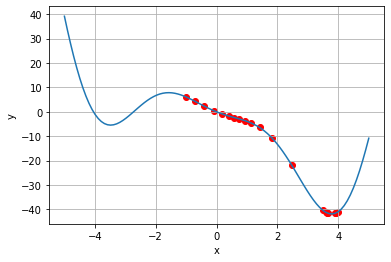

In [8]:
# Plot curve and points over epochs
plot(curve=curve, function=f(curve), x=x, y=y, epochs=epochs)